In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

np.random.seed(2)

Using TensorFlow backend.


## Data exploration

In [2]:
data = pd.read_csv("../Datasets/Credit card fraud detection/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
data.shape

(284807, 31)

In [4]:
data.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

## Preprocessing

In [8]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
data["normalizedAmount"] = scaler.fit_transform(data["Amount"].values.reshape(-1,1))

In [14]:
data.drop("Amount", axis=1, inplace=True)

In [15]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [16]:
data.drop("Time", axis=1, inplace=True)

In [17]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [18]:
X = data.drop("Class", axis=1)
y = data.Class

In [20]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [24]:
X_train.shape, X_test.shape

((199364, 29), (85443, 29))

In [25]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

## Deep neural network

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [32]:
model = Sequential([
    Dense(units=16, input_dim=X_test.shape[1], activation="relu"),
    Dense(units=24, activation="relu"),
    Dropout(0.5),
    Dense(20, activation="relu"),
    Dense(24, activation="relu"),
    Dense(1, activation="sigmoid") # because it's a binary classification problem
])
# Dropout layer in the middle to avoid overfitting

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_6 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_2 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_8 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
_________________________________________________________________


## Training

In [35]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=15, epochs=5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
199364/199364 [==============================] - 19s 94us/step - loss: 0.0100 - acc: 0.9979
Epoch 2/5
199364/199364 [==============================] - 18s 93us/step - loss: 0.0041 - acc: 0.9994
Epoch 3/5
199364/199364 [==============================] - 18s 93us/step - loss: 0.0035 - acc: 0.9994
Epoch 4/5
199364/199364 [==============================] - 18s 90us/step - loss: 0.0035 - acc: 0.9994
Epoch 5/5
199364/199364 [==============================] - 18s 88us/step - loss: 0.0033 - acc: 0.9994


In [36]:
score = model.evaluate(X_test, y_test)

85443/85443 [==============================] - 1s 12us/step


In [37]:
score # loss value, accuracy

[0.0045005676753232735, 0.9993797034280163]

## Confussion matrix

In [38]:
from sklearn.metrics import confusion_matrix

In [45]:
y_pred = model.predict(X_test).round()
y_test = pd.DataFrame(y_test)
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [46]:
cm = confusion_matrix(y_test, y_pred)

Text(0.5, 1.0, 'Confusion matrix')

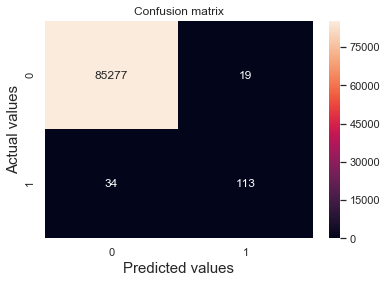

In [54]:
plt.figure()
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted values", fontsize=15)
plt.ylabel("Actual values", fontsize=15)
plt.title("Confusion matrix")

## Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [59]:
y_pred = random_forest.predict(X_test)
random_forest.score(X_test, y_test)

0.9995084442259752

Text(0.5, 1.0, 'Confusion matrix')

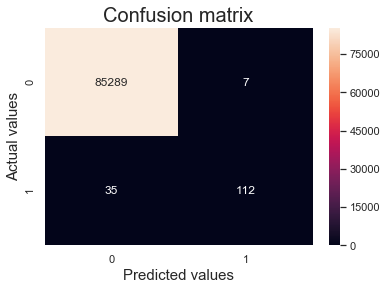

In [61]:
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted values", fontsize=15)
plt.ylabel("Actual values", fontsize=15)
plt.title("Confusion matrix", fontsize=20)

## Undersampling

In [71]:
fraud_indices = data[data["Class"] == 1].index
number_records_fraud = len(fraud_indices)

In [70]:
normal_indices = data[data["Class"] == 0].index

In [72]:
random_normal_indices = np.random.choice(normal_indices, size=number_records_fraud, replace=False)
len(random_normal_indices)

492

In [73]:
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])
len(under_sample_indices)

984

In [78]:
under_sample_data = data.iloc[under_sample_indices, :]

X_undersample = under_sample_data.drop(columns=["Class"])
y_undersample = under_sample_data["Class"]

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size=0.3, random_state=0)

Epoch 1/5
688/688 [==============================] - 1s 872us/step - loss: 0.6224 - acc: 0.5828
Epoch 2/5
688/688 [==============================] - 0s 112us/step - loss: 0.4144 - acc: 0.8023
Epoch 3/5
688/688 [==============================] - 0s 110us/step - loss: 0.3177 - acc: 0.8953
Epoch 4/5
688/688 [==============================] - 0s 108us/step - loss: 0.2298 - acc: 0.9186
Epoch 5/5
296/296 [==============================] - 0s 383us/step
Score of nn: [0.17685459030641093, 0.9256756756756757]


Text(0.5, 1.0, 'Confusion matrix')

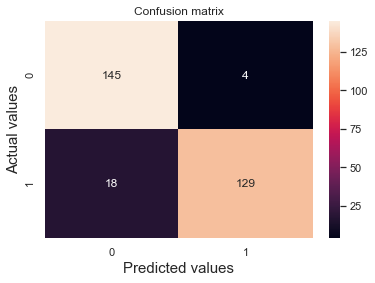

In [82]:
# Neural network

model = Sequential([
    Dense(units=16, input_dim=X_test.shape[1], activation="relu"),
    Dense(units=24, activation="relu"),
    Dropout(0.5),
    Dense(20, activation="relu"),
    Dense(24, activation="relu"),
    Dense(1, activation="sigmoid") # because it's a binary classification problem
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=15, epochs=5)

score = model.evaluate(X_test, y_test)
print("Score of nn: {}".format(score))
      
y_pred = model.predict(X_test).round()
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted values", fontsize=15)
plt.ylabel("Actual values", fontsize=15)
plt.title("Confusion matrix")

Random Forest accuracy: 95.270


Text(0.5, 1.0, 'Confusion matrix')

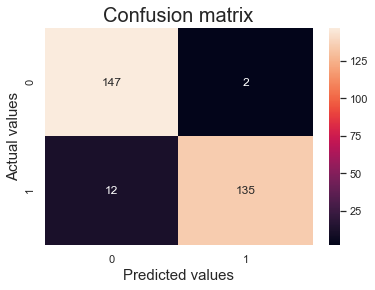

In [84]:
# Random Forest

random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)
score = random_forest.score(X_test, y_test)
print("Random Forest accuracy: {:.3f}".format(score*100))

cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted values", fontsize=15)
plt.ylabel("Actual values", fontsize=15)
plt.title("Confusion matrix", fontsize=20)

## SMOTE

In [85]:
!pip install imbalanced-learn

In [86]:
from imblearn.over_sampling import SMOTE

In [88]:
X_resample, y_resample = SMOTE().fit_sample(X, y)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.3, random_state=0)

In [90]:
X_train.shape

(398041, 29)

Epoch 1/5
398041/398041 [==============================] - 39s 98us/step - loss: 0.0417 - acc: 0.9848
Epoch 2/5
398041/398041 [==============================] - 40s 101us/step - loss: 0.0167 - acc: 0.9956
Epoch 3/5
398041/398041 [==============================] - 40s 101us/step - loss: 0.0136 - acc: 0.9966
Epoch 4/5
398041/398041 [==============================] - 46s 117us/step - loss: 0.0116 - acc: 0.9972
Epoch 5/5
170589/170589 [==============================] - 3s 17us/step
Score of nn: [0.009061691120031133, 0.9981124222546589]


Text(0.5, 1.0, 'Confusion matrix')

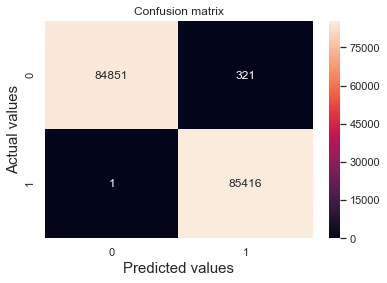

In [91]:
# Neural network

model = Sequential([
    Dense(units=16, input_dim=X_test.shape[1], activation="relu"),
    Dense(units=24, activation="relu"),
    Dropout(0.5),
    Dense(20, activation="relu"),
    Dense(24, activation="relu"),
    Dense(1, activation="sigmoid") # because it's a binary classification problem
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=15, epochs=5)

score = model.evaluate(X_test, y_test)
print("Score of nn: {}".format(score))
      
y_pred = model.predict(X_test).round()
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted values", fontsize=15)
plt.ylabel("Actual values", fontsize=15)
plt.title("Confusion matrix")

Random Forest accuracy: 99.989


Text(0.5, 1.0, 'Confusion matrix')

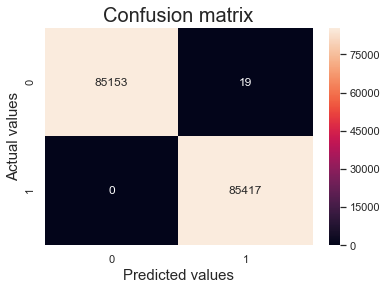

In [92]:
# Random Forest

random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)
score = random_forest.score(X_test, y_test)
print("Random Forest accuracy: {:.3f}".format(score*100))

cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted values", fontsize=15)
plt.ylabel("Actual values", fontsize=15)
plt.title("Confusion matrix", fontsize=20)